In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('HR_comma_sep.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

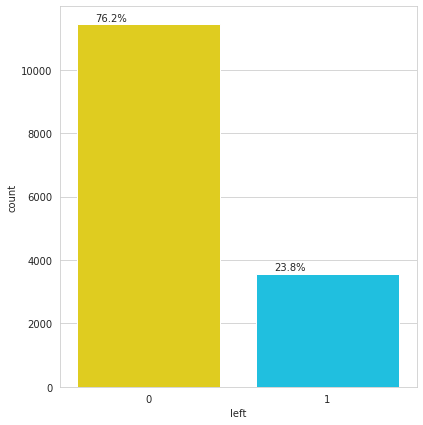

In [ ]:
plt.figure(figsize=[6.4, 7])
ax = sns.countplot(data= df , x = df['left'] , palette='jet_r')  
total = len(df)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+100))

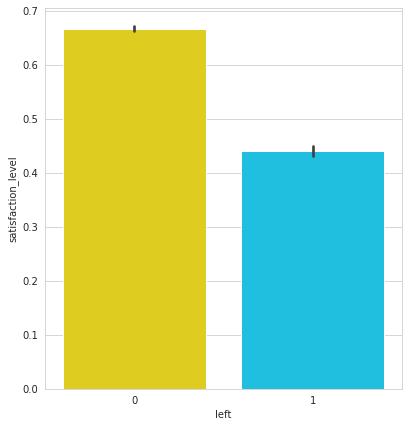

In [ ]:
plt.figure(figsize=[6.4, 7])
sns.set_style("whitegrid") 
sns.barplot(x='left', y='satisfaction_level', data=df, palette="jet_r" ) 


In [ ]:
left = df[df.left==1]
left.shape

(3571, 10)

In [ ]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [ ]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


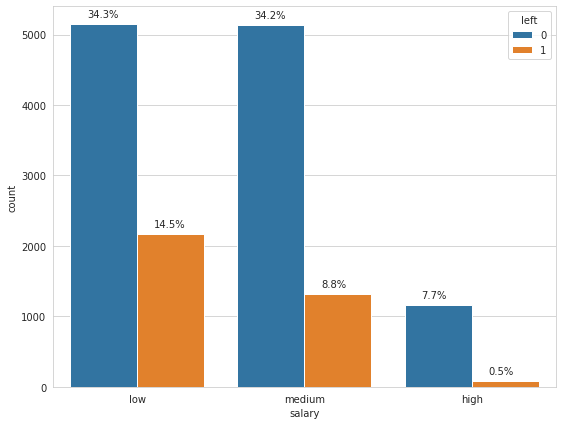

In [ ]:
plt.figure(figsize= [9 , 7])
ax  = sns.countplot(data = df ,  x = 'salary' , hue= 'left') 

total = len(df)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+100))

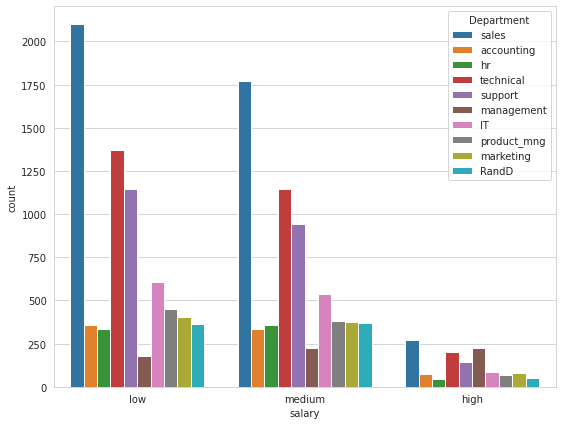

In [ ]:
plt.figure(figsize= [9 , 7])
sns.countplot(data = df ,  x = 'salary' , hue= 'Department')

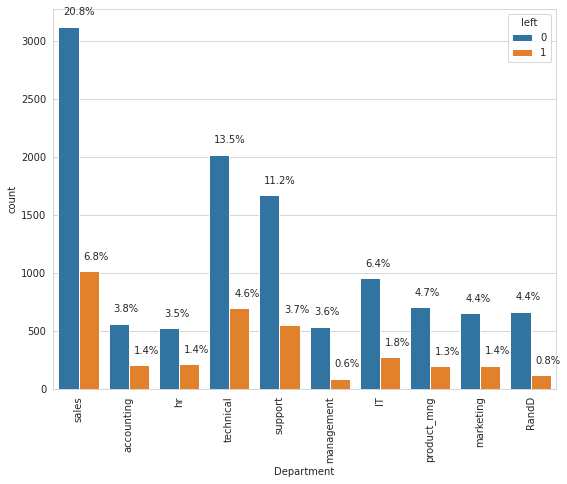

In [ ]:
plt.figure(figsize= [9 , 7])
ax = sns.countplot(data = df ,  x = 'Department' , hue= 'left') 
plt.xticks(rotation  = 90) 

total = len(df)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+100))

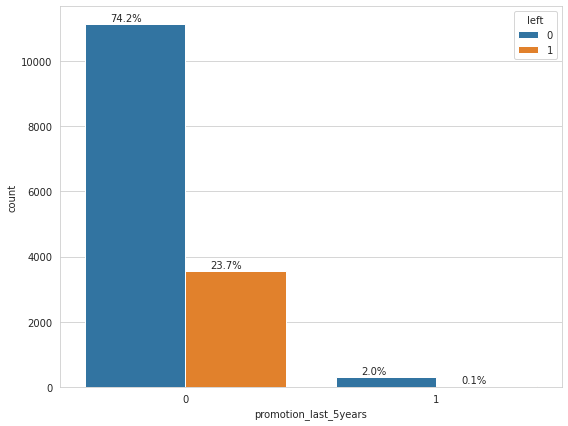

In [ ]:
plt.figure(figsize= [9 , 7])
ax = sns.countplot(data = df ,  x = 'promotion_last_5years' , hue= 'left') 


total = len(df)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+100))

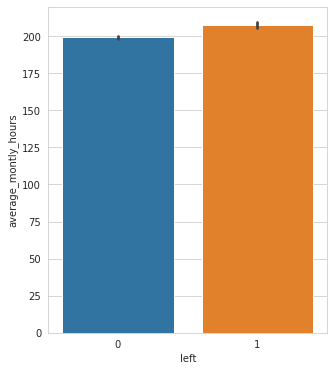

In [ ]:
plt.figure(figsize= [5 ,6 ])
sns.barplot(data=df , x = 'left' , y = 'average_montly_hours') 

In [ ]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [ ]:
salary_dummies = pd.get_dummies(subdf.salary , prefix= 'salary' , drop_first= True) 

In [ ]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_low,salary_medium
0,0.38,157,0,low,1,0
1,0.80,262,0,medium,0,1
2,0.11,272,0,medium,0,1
3,0.72,223,0,low,1,0
4,0.37,159,0,low,1,0


In [ ]:
df_with_dummies.drop('salary' , axis= 'columns' , inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [ ]:
X = df_with_dummies 
y = df.left 

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train, y_test    = train_test_split(X,y,test_size = 0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()

In [ ]:
model.fit(X_train  , y_train )

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_test , y_test)

0.7731111111111111

In [ ]:
X_test.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
5397,0.62,274,0,0,1
6744,0.83,259,0,1,0
12298,0.45,136,0,0,1
9059,0.18,248,0,1,0
6909,0.47,191,0,0,1


In [ ]:
model.predict([[0.11 , 220 , 0 , 1,0]])

array([1])